# 9.8 Hands-On Overfitting

In [125]:
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from cv2 import DenseOpticalFlow
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'2.11.0'

## 9.8.1 Build dataset

In [126]:
# Randomly choose 1000 samples, and split them into training and testing sets
N_SAMPLES = 2000
TEST_SIZE = 0.2
X, y = make_moons(n_samples = N_SAMPLES, noise=0.25, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=42)

In [127]:
def mscatter(x,y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, str):
                marker_path = mmarkers.MarkerStyle(marker).get_path().transformed(
                    mmarkers.MarkerStyle(marker).get_transform())
            else:
                marker_path = marker
            paths.append(marker_path)
        sc.set_paths(paths)
    return sc

<Figure size 200x200 with 0 Axes>

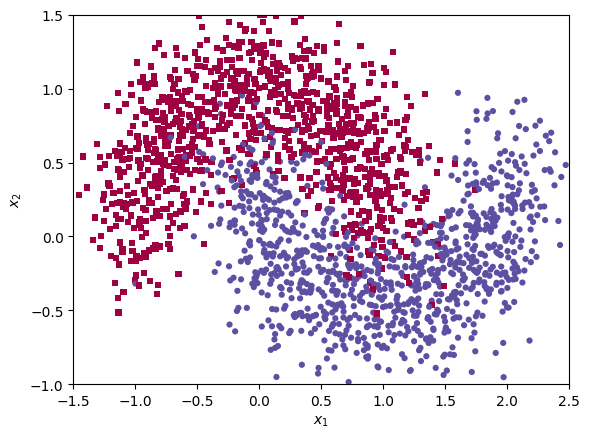

In [128]:
def make_plot(X, y, plot_name, file_name, XX=None, YY=None, preds=None):
    plt.figure(figsize=(2,2))
    plt.figure()
    # sns.set_style("whitegrid")
    axes = plt.gca()
    axes.set_xlim([-1.5,2.5])
    axes.set_ylim([-1,1.5])
    axes.set(xlabel="$x_1$", ylabel="$x_2$")
    # Plot prediction surface
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha=0.08, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), 
        levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    # Plot samples
    markers = ['o' if i == 1 else 's' for i in y.ravel()]
    mscatter(X[:, 0], X[:, 1], c=y.ravel(), s=20, cmap=plt.cm.Spectral, edgecolors='none', m=markers)
    # Save the figure
    plt.savefig(file_name)
    plt.savefig("./dropout/" + file_name)

# Plot data points
make_plot(X, y, None, "dataset.svg")


## 9.8.2 Influence of the Number of Network Layers

Epoch 1/10
50/50 [==============================] - 2s 2ms/step - loss: 0.6077 - accuracy: 0.7350
Epoch 2/10
50/50 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8494
Epoch 3/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8788
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.8944
Epoch 5/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9100
Epoch 6/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9119
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9269
Epoch 8/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.9281
Epoch 9/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1728 - accuracy: 0.9375
Epoch 10/10
13/13 [==============================] - 0s 1ms/step


<Figure size 200x200 with 0 Axes>

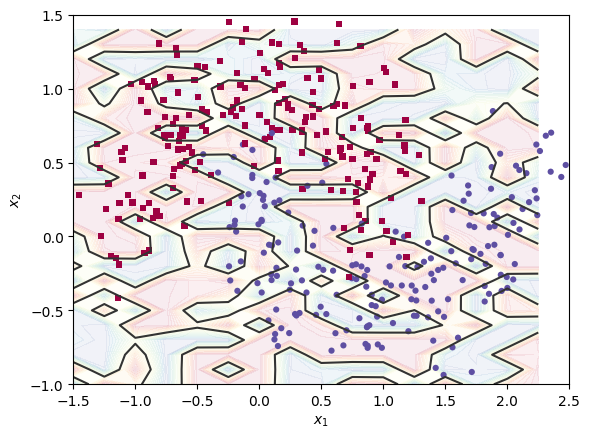

In [129]:
N_EPOCHS=10


for n in range(5): # Create 5 different network with different layers
    model = keras.Sequential()
    # Create 1st layer
    model.add(layers.Dense(8, input_dim=2, activation='relu'))
    for _ in range(n): # Add nth layer
        model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) # Add last layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Configure and train
history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=1)
preds=model.predict(X_test).reshape(-1)

title = "Network layer ({})".format(n)
file = "NetworkCapacity%f.png"%(2+n*1)
XX, YY = np.meshgrid(np.arange(-1.5, 2.5, 0.25), np.arange(-1, 1.5, 0.1))
make_plot(X_test, y_test, title, file, XX, YY, preds)

## 9.8.2 Impact of Dropout

Epoch 1/10
50/50 [==============================] - 2s 3ms/step - loss: 0.4919 - accuracy: 0.8356
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 0.3061 - accuracy: 0.8669
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2612 - accuracy: 0.8906
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9169
Epoch 5/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9212
Epoch 6/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9312
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9362
Epoch 8/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1654 - accuracy: 0.9406
Epoch 9/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.9369
Epoch 10/10
13/13 [==============================] - 0s 2ms/step
Epoch 1/10
50/50 [==============================] - 2

<Figure size 200x200 with 0 Axes>

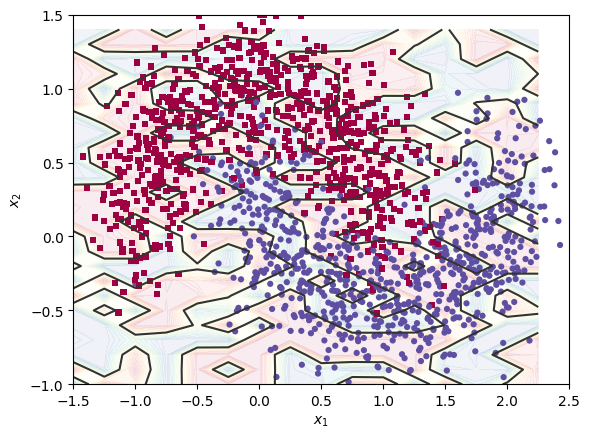

<Figure size 200x200 with 0 Axes>

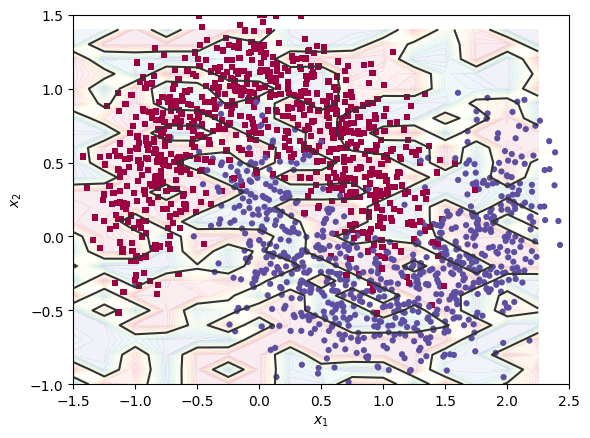

<Figure size 200x200 with 0 Axes>

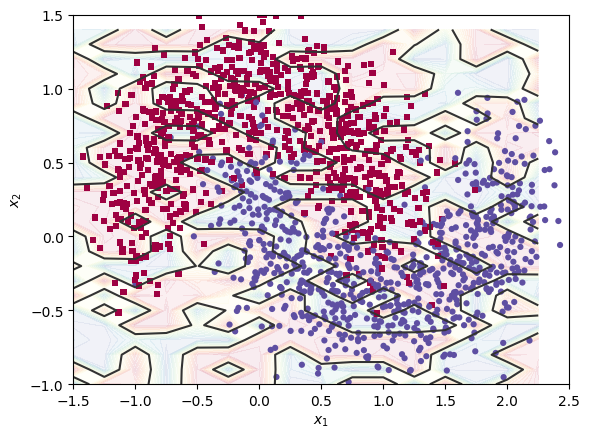

<Figure size 200x200 with 0 Axes>

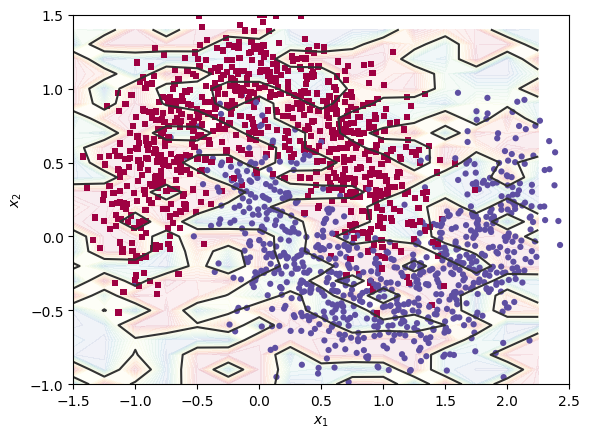

<Figure size 200x200 with 0 Axes>

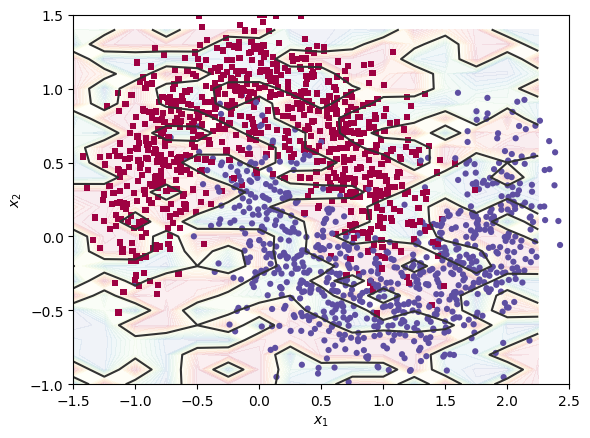

In [130]:
for n in range(5): # Create 5 different networks with different number of Dropout layers
    model = keras.Sequential()
    # Create 1st layer
    model.add(layers.Dense(8, input_dim=2,activation='relu'))
    counter = 0
    for _ in range(5): # Total number of layers is 5
        model.add(layers.Dense(64, activation='relu'))
        if counter < n: # Add n Dropout layers
            counter += 1
            model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(1, activation='sigmoid')) # Output layer
    model.compile(loss='binary_crossentropy', optimizer='adam', 
    metrics=['accuracy']) # Configure and train
    # Train
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=1)
    # Plot decision boundaries for different number of Dropout layers
    preds=model.predict(X_test).reshape(-1)
    title = "Dropout({})".format(n)
    file = "Dropout%f.png"%(n)
    make_plot(X_train, y_train, title, file, XX, YY, preds)

## 9.8.4 Impact of Regularization

In [131]:
from keras import regularizers
def build_model_with_regularization(_lambda):
    # Create networks with regularization terms
    model = keras.Sequential()
    model.add(layers.Dense(8, input_dim=2,activation='relu')) # without regularization
    model.add(layers.Dense(256, activation='relu', # With L2 regularization
    kernel_regularizer=regularizers.l2(_lambda)))
    model.add(layers.Dense(256, activation='relu', # With L2 regularization
                    kernel_regularizer=regularizers.l2(_lambda)))
    model.add(layers.Dense(256, activation='relu', # With L2 regularization
    kernel_regularizer=regularizers.l2(_lambda)))
    # Output
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', 
    metrics=['accuracy']) # Configure and train
    return model

In [132]:
def plot_weights_matrix(model, layer_index, plot_name, file_name):
    # Plot weight ranges
    # Get weights for certain layers
    LAYER_INDEX=layer_index
    weights = model.layers[LAYER_INDEX].get_weights()[0]
    # Get minimum, maximum and mean values
    min_val = round(weights.min(), 4)
    max_val = round(weights.max(), 4)
    mean_val = round(weights.mean(), 4)
    shape = weights.shape
    # Generate grids
    X = np.array(range(shape[1]))
    Y = np.array(range(shape[0]))
    X, Y = np.meshgrid(X, Y)
    print(file_name, min_val, max_val,mean_val)
    # Plot 3D figures
    fig = plt.figure()
    # ax = fig.gca(projection='3d')
    ax = fig.add_subplot(111, projection='3d')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # Plot weight ranges
    surf = ax.plot_surface(X, Y, weights, cmap=plt.get_cmap('rainbow'), linewidth=0)
    ax.set_xlabel('x', fontsize=16, rotation = 0)
    ax.set_ylabel('y', fontsize=16, rotation = 0)
    ax.set_zlabel('weight', fontsize=16, rotation = 90)
    # save figure
    # create a new directory called regularization and place it in there
    plt.savefig("./regularization/"+file_name+".svg")
    plt.savefig(file_name + ".svg")

Epoch 1/10
50/50 [==============================] - 2s 4ms/step - loss: 0.3999 - accuracy: 0.8413
Epoch 2/10
50/50 [==============================] - 0s 5ms/step - loss: 0.3091 - accuracy: 0.8687
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 0.2885 - accuracy: 0.8819
Epoch 4/10
50/50 [==============================] - 0s 5ms/step - loss: 0.2780 - accuracy: 0.8906
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 0.2493 - accuracy: 0.9087
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 0.2162 - accuracy: 0.9244
Epoch 7/10
50/50 [==============================] - 0s 4ms/step - loss: 0.2252 - accuracy: 0.9206
Epoch 8/10
50/50 [==============================] - 0s 5ms/step - loss: 0.1927 - accuracy: 0.9294
Epoch 9/10
50/50 [==============================] - 0s 4ms/step - loss: 0.1830 - accuracy: 0.9356
Epoch 10/10
50/50 [==============================] - 0s 4ms/step - loss: 0.1905 - accuracy: 0.9294
 Regularization _1e

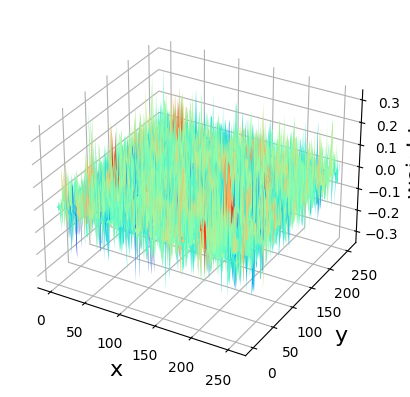

<Figure size 200x200 with 0 Axes>

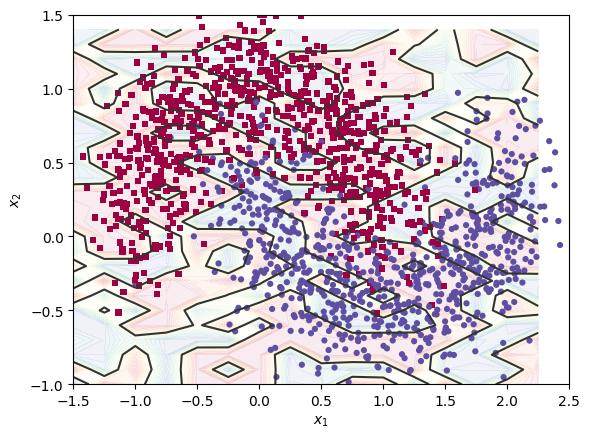

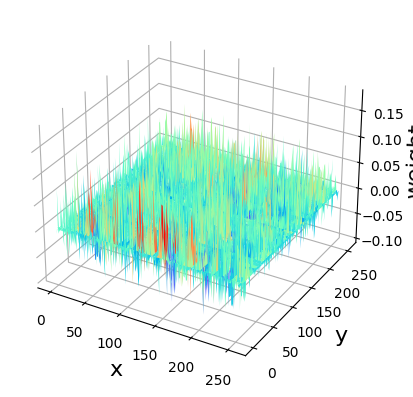

<Figure size 200x200 with 0 Axes>

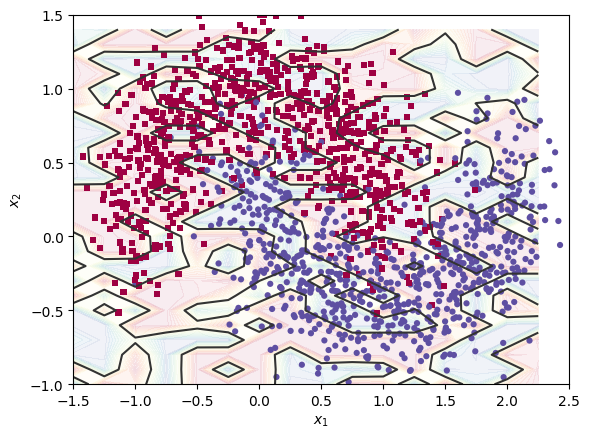

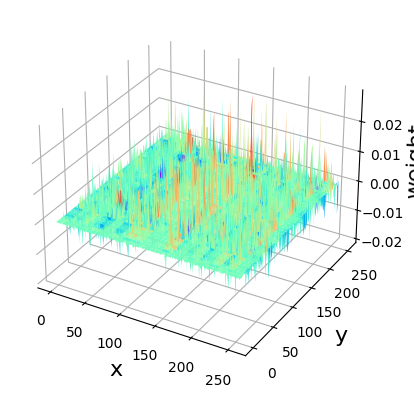

<Figure size 200x200 with 0 Axes>

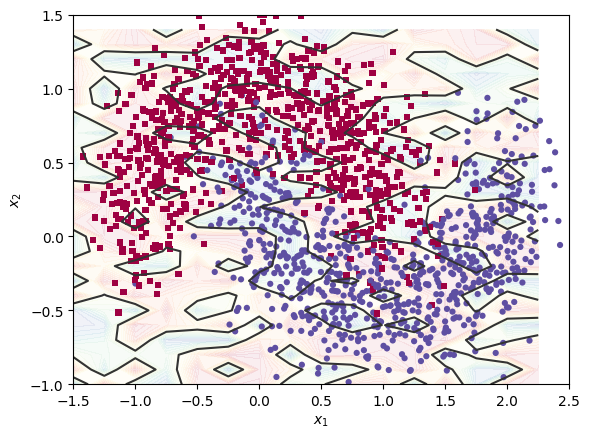

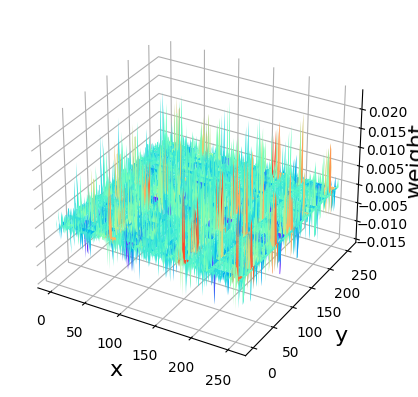

<Figure size 200x200 with 0 Axes>

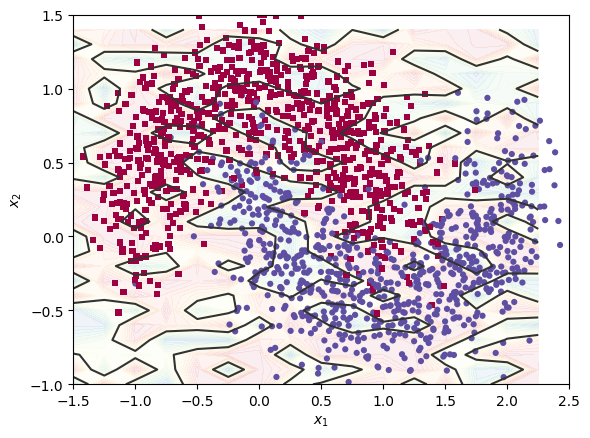

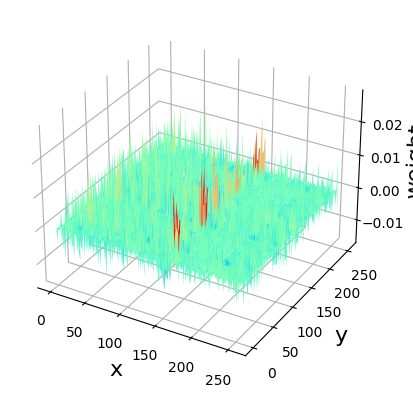

<Figure size 200x200 with 0 Axes>

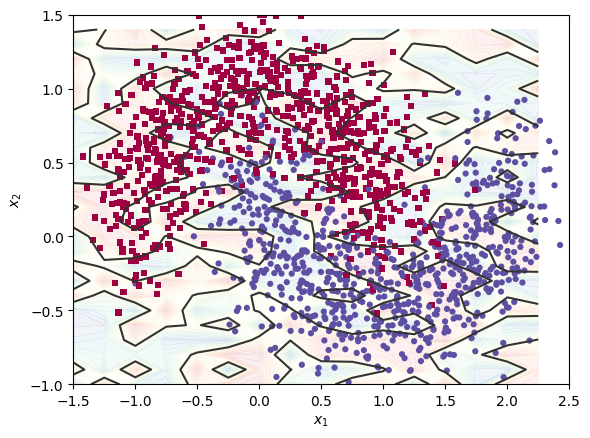

In [133]:
for _lambda in [1e-5,1e-3,1e-1,0.12,0.13]:
    # Create model with regularization term
    model = build_model_with_regularization(_lambda)
    # Train model
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, 
    verbose=1)
    # Plot weight range
    layer_index = 2
    plot_title = "Regularization-[lambda = {}]".format(str(_lambda))
    file_name = " Regularization _" + str(_lambda)
    # Plot weight ranges
    plot_weights_matrix(model, layer_index, plot_title, file_name)
    # Plot decision boundaries
    # preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
    preds=model.predict(X_test).reshape(-1)
    title = " regularization ".format(_lambda)
    file = " regularization %f.svg"%_lambda
    make_plot(X_train, y_train, title, file, XX, YY, preds)